<a href="https://colab.research.google.com/github/naianazevedo/Imersao-Dados-com-Python-Alura/blob/main/Imers%C3%A3o_Dados_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Aula 1 - Análise de Dados com Pandas**

---



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario_original',  # Renomeado para evitar conflito
    'salary_currency': 'moeda',
    'salary_in_usd': 'salario_em_usd', # Renomeado para evitar conflito
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario_original', 'moeda',
       'salario_em_usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [10]:
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario_original', 'moeda',
       'salario_em_usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [11]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [14]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [15]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
})

df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [16]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
})

df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [17]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
})

df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [18]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
})

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [19]:
df.head(10)

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
5,2025.0,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,Média
6,2025.0,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Média
7,2025.0,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Média
8,2025.0,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Média
9,2025.0,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Média


In [20]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

,ano,salario_original,salario_em_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


---
#**Aula 2 - Imersão de Dados com Python**

---



In [22]:
df.isnull()

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.head()

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [24]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario_original,0
moeda,0
salario_em_usd,0
residencia,0
remoto,0
empresa,0


In [25]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Significado de 'NAN' = NOT A NUMBER

In [26]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [27]:
import numpy as np

#Criação de um DataFrame de teste para usar de exemplo
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

#Calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#Calcula a mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [28]:
df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [29]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})


df_cidades['cidade_preenchidas'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_preenchidas
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [30]:
df_limpo = df.dropna()

In [31]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario_original,0
moeda,0
salario_em_usd,0
residencia,0
remoto,0
empresa,0


In [32]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [33]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ano               133339 non-null  float64
 1   senioridade       133339 non-null  object 
 2   contrato          133339 non-null  object 
 3   cargo             133339 non-null  object 
 4   salario_original  133339 non-null  int64  
 5   moeda             133339 non-null  object 
 6   salario_em_usd    133339 non-null  int64  
 7   residencia        133339 non-null  object 
 8   remoto            133339 non-null  object 
 9   empresa           133339 non-null  object 
 10  tamanho_empresa   133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

---
#**Aula 3 - Imersão de Dados com Python**

---





In [35]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

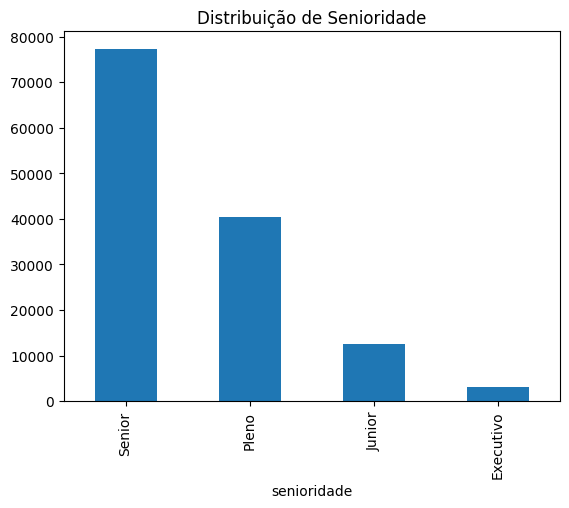

In [36]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [37]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salario_em_usd'>

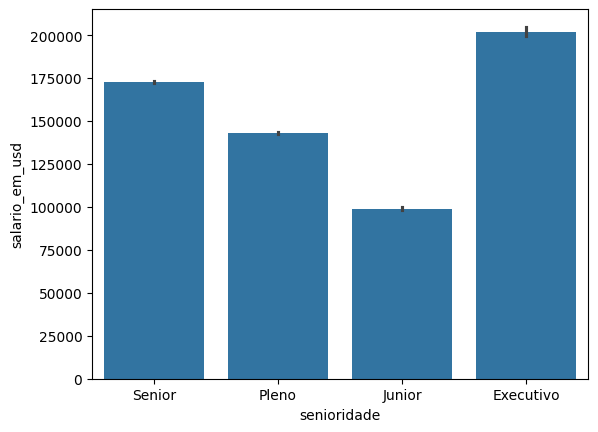

In [38]:
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_usd')

In [39]:
import matplotlib.pyplot as plt

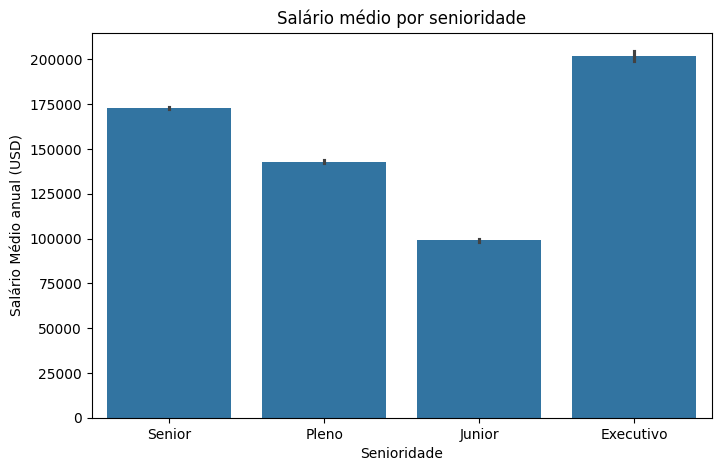

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio anual (USD)')
plt.show()

In [41]:
df_limpo.groupby('senioridade')['salario_em_usd'].mean().sort_values(ascending=False)

,salario_em_usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [42]:
ordem = df_limpo.groupby('senioridade')['salario_em_usd'].mean().sort_values(ascending=False).index

In [43]:
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

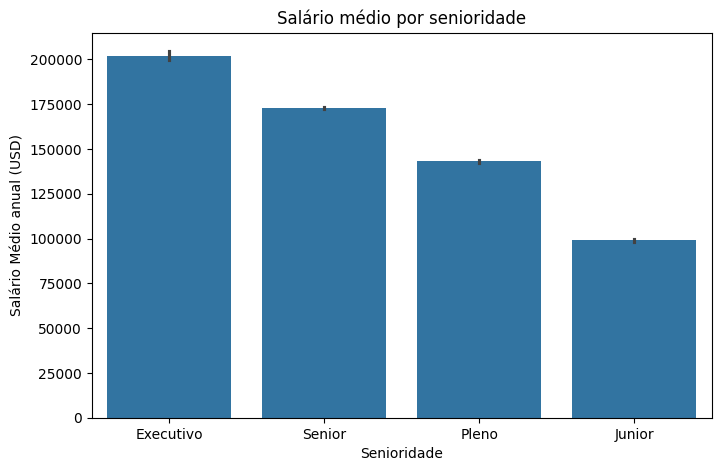

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_usd', order= ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio anual (USD)')
plt.show()

In [45]:
ordem = df_limpo.groupby('senioridade')['salario_em_usd'].mean().sort_values(ascending=True).index

Alterando a palavra 'False' para 'True' é possível mudar a distribuição das colunas do gráfico

In [46]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

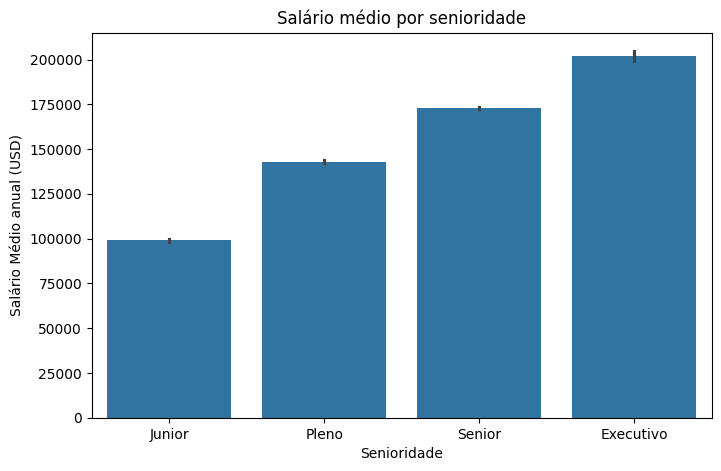

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='salario_em_usd', order= ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio anual (USD)')
plt.show()

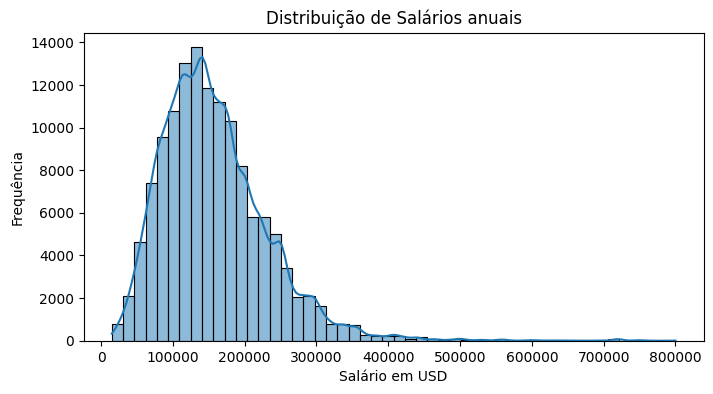

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['salario_em_usd'], bins = 50, kde=True)
plt.title('Distribuição de Salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

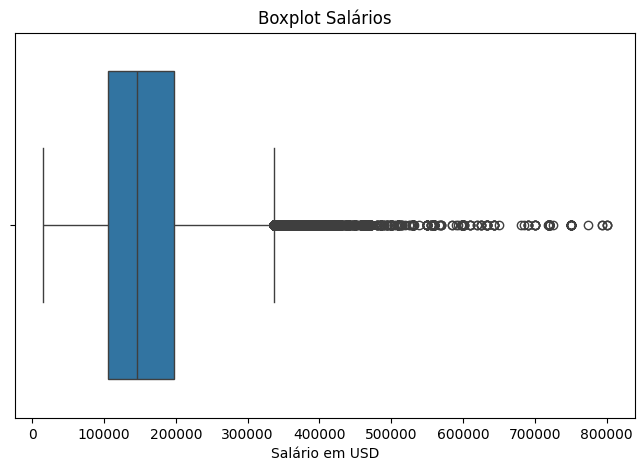

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['salario_em_usd'])
plt.title('Boxplot Salários')
plt.xlabel('Salário em USD')
plt.show()

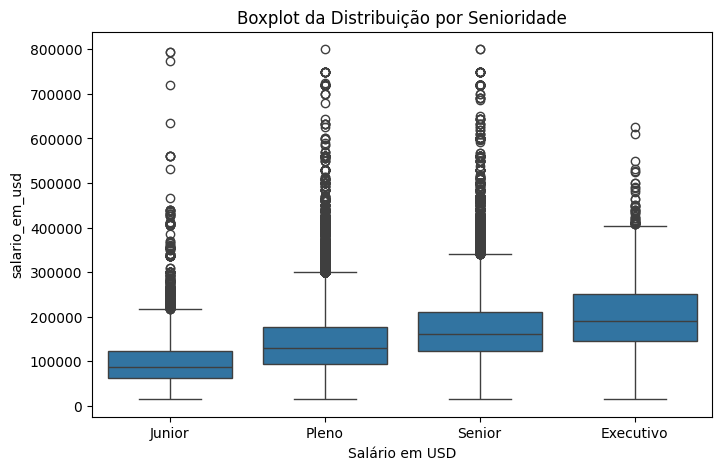

In [50]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='salario_em_usd', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot da Distribuição por Senioridade')
plt.xlabel('Salário em USD')
plt.show()

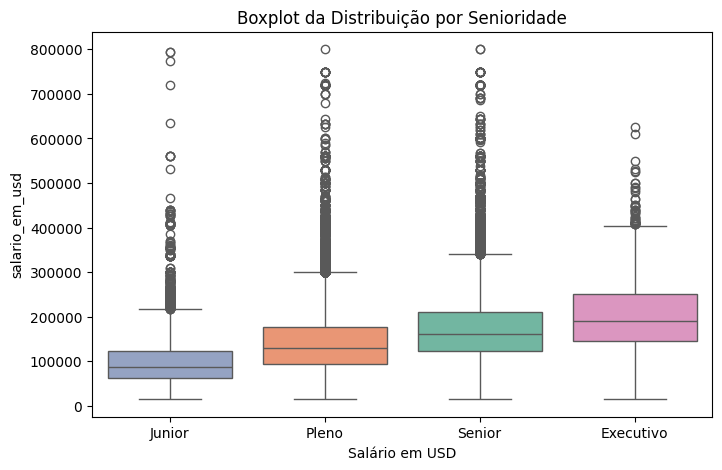

In [51]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='salario_em_usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da Distribuição por Senioridade')
plt.xlabel('Salário em USD')
plt.show()

In [52]:
import plotly.express as px

In [53]:
df_senioridade_salario = df_limpo.groupby('senioridade')['salario_em_usd'].mean().reindex(ordem_senioridade).reset_index()

fig = px.bar(
    df_senioridade_salario,
    x='senioridade',
    y='salario_em_usd',
    title='Média Salarial por Senioridade',
    labels={'senioridade': 'Nível de Senioridade', 'salario_em_usd': 'Média Salarial Anual (USD)'},
    color='senioridade',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(xaxis_title='Senioridade', yaxis_title='Média Salarial Anual (USD)')
fig.show()

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']



fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho'
             )

fig.show()

In [55]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']



fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho',
             hole=0.5
             )

fig.show()

In [56]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']



fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos Tipo de Trabalho',
             hole=0.5
             )
fig.update_traces(textinfo='percent + label')
fig.show()

In [57]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média



---
▶ **Desafio:** Criar um gráfico que mostre a diferença de média salarial para o cargo de **Cientista de Dados** para os paises

---



In [58]:
ordem_cargo = df_limpo.groupby('cargo')['salario_em_usd'].mean().sort_values(ascending=False).index

In [59]:
ordem_cargo

Index(['Research Team Lead', 'Analytics Engineering Manager',
       'Data Science Tech Lead', 'Applied AI ML Lead', 'Head of Applied AI',
       'Head of Machine Learning', 'Machine Learning Performance Engineer',
       'Director of Product Management', 'Engineering Manager',
       'AWS Data Architect',
       ...
       'Platform Data Engineer', 'CRM Data Analyst',
       'Principal Data Architect', 'Clinical Data Operator', 'Stage',
       'Clinical Aide', 'AI Software Development Engineer',
       'Analytics Analyst', 'AI Engineering Lead', 'Alternance'],
      dtype='object', name='cargo', length=390)

In [60]:
df_cargo = df_limpo.groupby('cargo')['salario_em_usd'].mean().reindex(ordem_cargo).reset_index()

fig = px.bar(
    df_cargo,
    x='cargo',
    y='salario_em_usd',
    title='Média Salarial por Cargo',
    labels={'cargo': 'Cargo', 'salario_em_usd': 'Média por Cargo (USD)'},
    color='cargo',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(xaxis_title='Cargo', yaxis_title='Média por Cargo (USD)')
fig.show()

In [61]:
ordem_residencia = df_limpo.groupby('residencia')['salario_em_usd'].mean().sort_values(ascending=False).index

In [62]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

In [63]:
df_residencia = df_limpo.groupby('residencia')['salario_em_usd'].mean().reindex(ordem_residencia).reset_index()

fig = px.bar(
    df_residencia,
    x='residencia',
    y='salario_em_usd',
    title='Média Salarial por Cidade',
    labels={'residencia': 'Cidade', 'salario_em_usd': 'Média por Cargo (USD)'},
    color='residencia',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(xaxis_title='Cidade', yaxis_title='Média por Cidade (USD)')
fig.show()

In [64]:
df_data = df_limpo[df_limpo['cargo'] == 'Data Engineer']
df_cargo_data = df_data.groupby('residencia')['salario_em_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    df_cargo_data,
    x='residencia',
    y='salario_em_usd',
    title='Média Salarial Data Engineer por Residência',
    labels={'residencia': 'Residência do Funcionário', 'salario_em_usd': 'Média Salarial Anual (USD)'},
    color='residencia',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(xaxis_title='Residência', yaxis_title='Média Salarial Anual (USD)')
fig.show()

**Modelo proposto pelos instrutores**

In [66]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.9 MB/s eta 0:00:00


In [68]:
import pycountry

#Função que converte ISO-2 para ISO-3
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except AttributeError:
    return None

#Cria uma nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

#Calcula a média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salario_em_usd'].mean().reset_index()

#Gera o mapa para o gráfico
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salario_em_usd',
                    color_continuous_scale='rdylgn',
                    hover_name='residencia_iso3',
                    title='Salário Médio por País para Cientista de Dados',
                    labels={'salario_em_usd': 'Salário Médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [69]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario_original,moeda,salario_em_usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [70]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)